### **Graph 1**

#### Google Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 사용할 module import

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

#### 데이터 불러오기
**# Columns Information**
- company: 회사명
- investment: 누적투자금액
- sales: 매출
- employee: 고용수
- category: 카테고리
- keyword: 키워드
- establishment: 설립년도
- view: 최근 조회수
- total_mean: 최종 순위

In [ ]:
# CSV 파일 불러오기
nodes = pd.read_csv('/content/drive/MyDrive/2024-1 graph-mining/final_project/startup_2.csv')

#### [Node] : startup name
- 회사명 : company
- 크기 : investment/establishment

In [ ]:
# 노드 데이터프레임에서 노드 리스트 생성
nodes_list = nodes['company'].tolist()

#### [Edge] : category
- 같은 카테고리 속한 기업 연결

In [ ]:
# 엣지 생성을 위한 데이터프레임 생성
edges_df = nodes[['company', 'category']].copy()

#### 그래프 생성
- Node와 Edge 연결
- Node의 attribute 추가 -> 누적투자금액에 따라 노드 크기

In [ ]:
# 노드 리스트를 딕셔너리 형태로 변환하여 노드 ID로 사용
nodes_dict = {node: idx for idx, node in enumerate(nodes_list)}

In [ ]:
# 엣지를 연결할 그래프 객체 생성
G = nx.Graph()

In [ ]:
# 노드 추가 및 속성 설정
for idx, row in nodes.iterrows():
    company = row['company']
    investment = row['investment']
    G.add_node(company, investment=investment)

In [ ]:
# 엣지 추가
for _, row in edges_df.iterrows():
    company = row['company']
    categories = row['category'].split(',')  # 쉼표를 기준으로 카테고리를 분할
    for category in categories:
        # 같은 category에 속한 노드를 연결
        connected_nodes = edges_df[edges_df['category'].str.contains(category)]['company'].tolist()
        for connected_node in connected_nodes:
            if company != connected_node:  # 자기 자신과는 연결하지 않도록 조건 추가
                G.add_edge(company, connected_node)

#### GraphML 함수


In [ ]:
# graphml 파일로 저장하는 함수 정의
def save_graphml(graph, filename):
    nx.write_graphml_lxml(graph, filename)

#### 생성된 Node, Edge 개수 확인

In [ ]:
# 노드 개수 출력
print("Number of nodes:", G.number_of_nodes())

# 엣지 개수 출력
print("Number of edges:", G.number_of_edges())

Number of nodes: 326
Number of edges: 10634


#### GraphML 파일로 저장

In [ ]:
# GraphML 파일로 저장
save_graphml(G, "startup_graph_1.graphml")

#### Network Analysis & Visualization

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [ ]:
# GraphML 파일로부터 그래프 불러오는 함수 정의
def load_graphml(filename):
    return nx.read_graphml(filename)

#### Graph Load & visualization

In [ ]:
# 그래프 로드
G = load_graphml("startup_graph_1.graphml")

In [ ]:
# 시각화를 위한 그래프 레이아웃 설정
pos = nx.spring_layout(G)

#### betweeness centrality

In [ ]:
# betweenness centrality 계산
betweenness = nx.betweenness_centrality(G)

In [ ]:
# betweenness centrality를 데이터프레임으로 변환하고 정렬
betweenness_df = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness'])
betweenness_df = betweenness_df.sort_values(by='Betweenness', ascending=False)

# CSV 파일로 저장
betweenness_df.to_csv('betweenness_centrality_sorted.csv', index=False)

<ipython-input-29-9c25feab9227>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


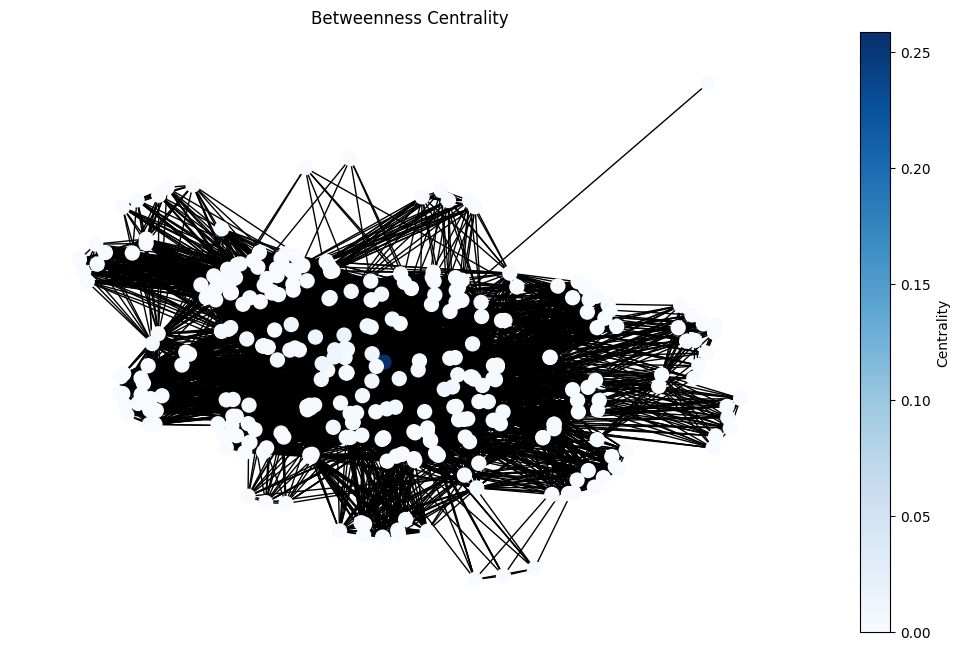

In [ ]:
# betweenness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(betweenness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Betweenness Centrality")
plt.show()

#### closeness centrality

In [ ]:
# closeness centrality 계산
closeness = nx.closeness_centrality(G)

In [ ]:
# closeness centrality를 데이터프레임으로 변환하고 정렬
closeness_df = pd.DataFrame(closeness.items(), columns=['Node', 'Closeness'])
closeness_df = closeness_df.sort_values(by='Closeness', ascending=False)

# CSV 파일로 저장
closeness_df.to_csv('closeness_centrality_sorted.csv', index=False)

<ipython-input-32-e5c45fc11627>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


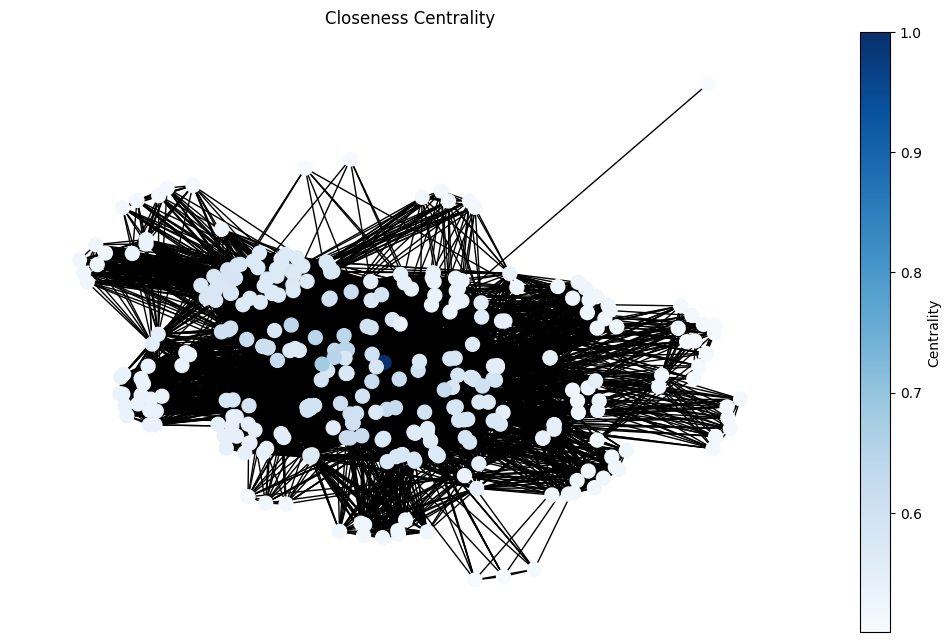

In [ ]:
# closeness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(closeness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Closeness Centrality")
plt.show()

#### degree centrality

In [ ]:
# degree centrality 계산
degree = nx.degree_centrality(G)

In [ ]:
# degree centrality를 데이터프레임으로 변환하고 정렬
degree_df = pd.DataFrame(degree.items(), columns=['Node', 'Degree'])
degree_df = degree_df.sort_values(by='Degree', ascending=False)

# CSV 파일로 저장
degree_df.to_csv('degree_centrality_sorted.csv', index=False)

<ipython-input-35-dc3e35499bc0>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


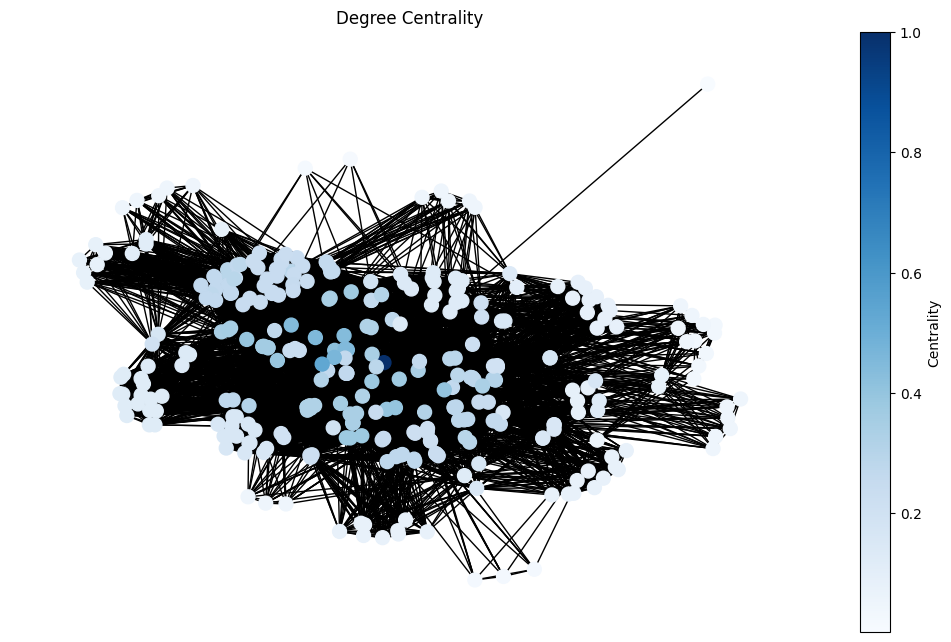

In [ ]:
# degree centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(degree.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Degree Centrality")
plt.show()

#### clustering coefficient

In [ ]:
# clustering coefficient 계산
clustering = nx.clustering(G)

In [ ]:
# clustering coefficient를 데이터프레임으로 변환하고 정렬
clustering_df = pd.DataFrame(clustering.items(), columns=['Node', 'Clustering'])
clustering_df = clustering_df.sort_values(by='Clustering', ascending=False)

# CSV 파일로 저장
clustering_df.to_csv('clustering_coefficient_sorted.csv', index=False)

<ipython-input-39-f1213f1f4155>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Clustering")


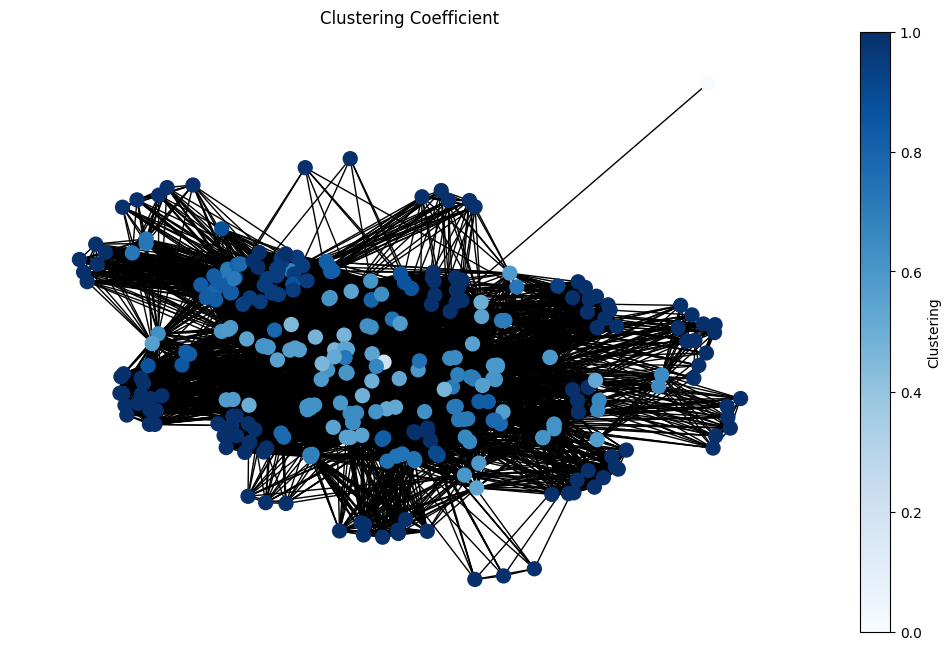

In [ ]:
# clustering coefficient 시각화
plt.figure(figsize=(10, 6))
node_color = list(clustering.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Clustering")
plt.title("Clustering Coefficient")
plt.show()

#### community detection

In [ ]:
# Louvain 알고리즘을 사용하여 community detection 수행
partition = community_louvain.best_partition(G)

# community 별 노드 출력
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes_in_community in communities.items():
    print(f"Community {community_id}: {nodes_in_community}")

Community 0: ['뤼튼테크놀로지스_뤼튼', '업스테이지_아숙업', '모아이스_골프픽스', '보이저엑스_브루', '매스프레소_콴다', '아우름플래닛_라이너', '블래스트', '아키드로우_아키스케치', '핀다_핀다', '트웰브랩스_마렝고', '뉴빌리티_뉴비', '프리윌린_매쓰플랫', '뤼이드_산타', '데이터노우즈_리치고', '패러닷_캐럿', '시제_모노리스', '네오사피엔스_타입캐스트', '브레인커머스_잡플래닛', '루센트블록_소유', '슈퍼브에이아이_슈퍼브에이아이', '자비스앤빌런즈_삼쩜삼', '로앤컴퍼니_로톡', '필라이즈_필라이즈', '콕스웨이브_얼라인AI', '제로엑스플로우_원아워', '스트라드비젼_자율주행기능지원기술', '왓챠_왓챠', '튜링_수학대왕', '퓨리오사에이아이_WARBOY', '카카오브이엑스_카카오골프예약', '모레', '페르소나에이아이_봇톡스', '인터콘시스템스_', '원프레딕트_원프레딕트', '파스토_파스토', '스타일봇_스타일봇', '서울로보틱스_서울로보틱스', '마키나락스_MRX 솔루션', '비바이노베이션_착한의사', '에아아이트릭스', '아드리엘_아드리엘', '허그램_티그램', '코드박스_ZUZU', '딥브레인에이아이_스픽나우', '어웨이크코퍼레이션_초원인', '스켈터랩스_스켈터랩스', '클로봇', '앤스페이스_스페이스클라우드', '에이젠글로벌_에이젠글로벌', '튜닙', '컨텍터스_둥지', '작당모의_잼페이스', '비프로컴퍼니_비프로11', '뉴로핏', '인덴트코퍼레이션_브이리뷰', '엑스와이지', '마이프랜차이즈_마이프차', '코드스테이츠_코드스테이츠', '피처링_피처링', '셀렉트스타_캐시미션', '수퍼톤_고요', '퀄슨_리얼클래스', '아들러_아들러', '한국공간데이터_클리니어', '플랭_플랭', '백퍼센트_충전돼지', '루닛_루닛 인사이트 CXR', '라이드플럭스', '베어로보틱스_서비', '그레이드헬스체인_로그', '에이아이포펫_티티케어']
Community 1: ['버킷플레이스_오늘의집', '해녀의부엌_해녀의 부

In [ ]:
# community detection 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(partition.items(), columns=['Node', 'Community'])

# CSV 파일로 저장
result_df.to_csv('community_detection_graph1.csv', index=False)

<ipython-input-94-2cf7ecb2bf1f>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용


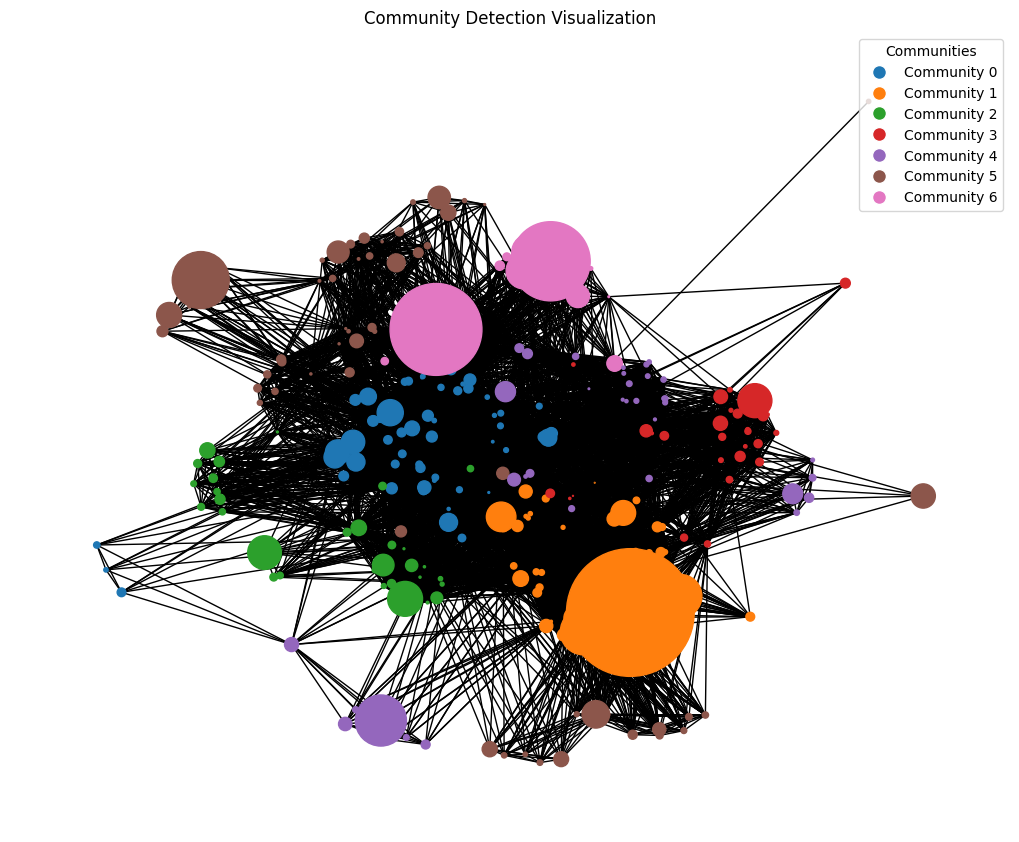

In [ ]:
# 시각화를 위한 노드 색상 설정
cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용
node_colors = [cmap(partition[node] % 10) for node in G.nodes()]

# 노드 크기 설정 (투자금 기반)
node_sizes = [G.nodes[node]['investment'] for node in G.nodes()]

# 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, with_labels=False)

# 커뮤니티 정보에 따라 범례 생성
unique_communities = set(partition.values())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(community_id % 10), markersize=10, label=f'Community {community_id}') for community_id in unique_communities]
plt.legend(handles=legend_handles, title='Communities', loc='upper right')

plt.title('Community Detection Visualization')
plt.show()

### **Graph 2**

#### 사용할 module import

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

#### 데이터 불러오기
**# Columns Information**
- company: 회사명
- investment: 누적투자금액
- sales: 매출
- employee: 고용수
- category: 카테고리
- keyword: 키워드
- establishment: 설립년도
- view: 최근 조회수
- total_mean: 최종 순위

In [ ]:
# CSV 파일 불러오기
nodes = pd.read_csv('/content/drive/MyDrive/2024-1 graph-mining/final_project/startup_2.csv')

#### [Node] : startup name
- 회사명 : company
- 크기 : sales/establishment

In [ ]:
# 노드 데이터프레임에서 노드 리스트 생성
nodes_list = nodes['company'].tolist()

#### [Edge] : category
- 같은 카테고리 속한 기업 연결

In [ ]:
# 엣지 생성을 위한 데이터프레임 생성
edges_df = nodes[['company', 'category']].copy()

#### 그래프 생성
- Node와 Edge 연결
- Node의 attribute 추가 -> 매출에 따라 노드 크기

In [ ]:
# 노드 리스트를 딕셔너리 형태로 변환하여 노드 ID로 사용
nodes_dict = {node: idx for idx, node in enumerate(nodes_list)}

In [ ]:
# 엣지를 연결할 그래프 객체 생성
G = nx.Graph()

In [ ]:
# 노드 추가 및 속성 설정
for idx, row in nodes.iterrows():
    company = row['company']
    sales = row['sales']
    G.add_node(company, sales=sales)

In [ ]:
# 엣지 추가
for _, row in edges_df.iterrows():
    company = row['company']
    categories = row['category'].split(',')  # 쉼표를 기준으로 카테고리를 분할
    for category in categories:
        # 같은 category에 속한 노드를 연결
        connected_nodes = edges_df[edges_df['category'].str.contains(category)]['company'].tolist()
        for connected_node in connected_nodes:
            if company != connected_node:  # 자기 자신과는 연결하지 않도록 조건 추가
                G.add_edge(company, connected_node)

#### graphml 함수


In [ ]:
# graphml 파일로 저장하는 함수 정의
def save_graphml(graph, filename):
    nx.write_graphml_lxml(graph, filename)

#### 생성된 Node, Edge 개수 확인

In [ ]:
# 노드 개수 출력
print("Number of nodes:", G.number_of_nodes())

# 엣지 개수 출력
print("Number of edges:", G.number_of_edges())

Number of nodes: 326
Number of edges: 10634


#### graphml 파일로 저장

In [ ]:
# GraphML 파일로 저장
save_graphml(G, "startup_graph_2.graphml")

#### Network Analysis & Visualization

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [ ]:
# GraphML 파일로부터 그래프 불러오는 함수 정의
def load_graphml(filename):
    return nx.read_graphml(filename)

#### Graph Load & visualization

In [ ]:
# 그래프 로드
G = load_graphml("startup_graph_2.graphml")

In [ ]:
# 시각화를 위한 그래프 레이아웃 설정
pos = nx.spring_layout(G)

#### betweeness centrality

In [ ]:
# betweenness centrality 계산
betweenness = nx.betweenness_centrality(G)

In [ ]:
# betweenness centrality를 데이터프레임으로 변환하고 정렬
betweenness_df = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness'])
betweenness_df = betweenness_df.sort_values(by='Betweenness', ascending=False)

# CSV 파일로 저장
betweenness_df.to_csv('betweenness_centrality_graph2.csv', index=False)

<ipython-input-56-9c25feab9227>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


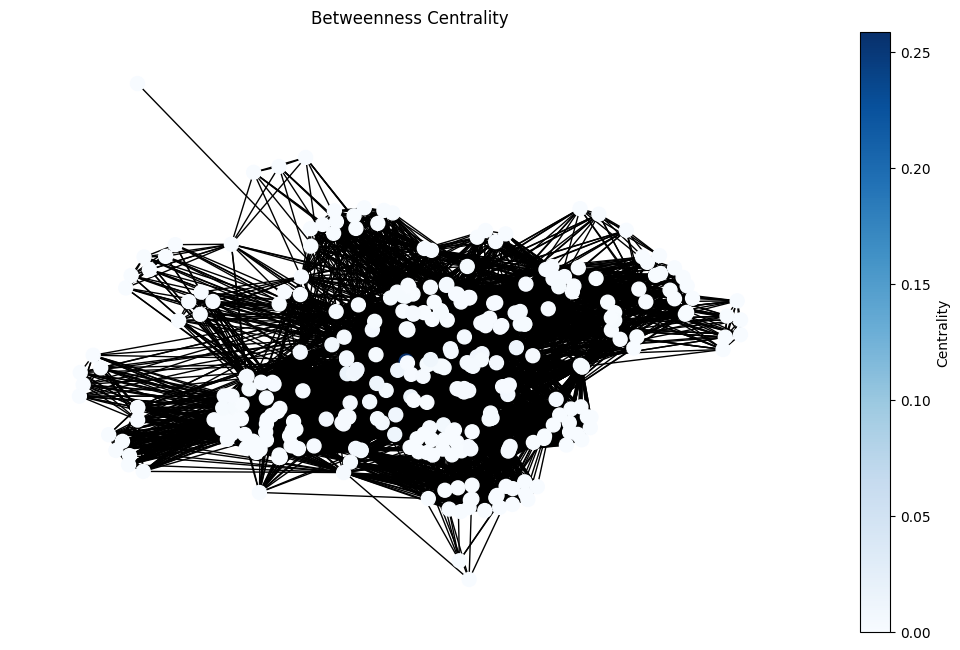

In [ ]:
# betweenness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(betweenness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Betweenness Centrality")
plt.show()

#### closeness centrality

In [ ]:
# closeness centrality 계산
closeness = nx.closeness_centrality(G)

In [ ]:
# closeness centrality를 데이터프레임으로 변환하고 정렬
closeness_df = pd.DataFrame(closeness.items(), columns=['Node', 'Closeness'])
closeness_df = closeness_df.sort_values(by='Closeness', ascending=False)

# CSV 파일로 저장
closeness_df.to_csv('closeness_centrality_graph2.csv', index=False)

<ipython-input-59-e5c45fc11627>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


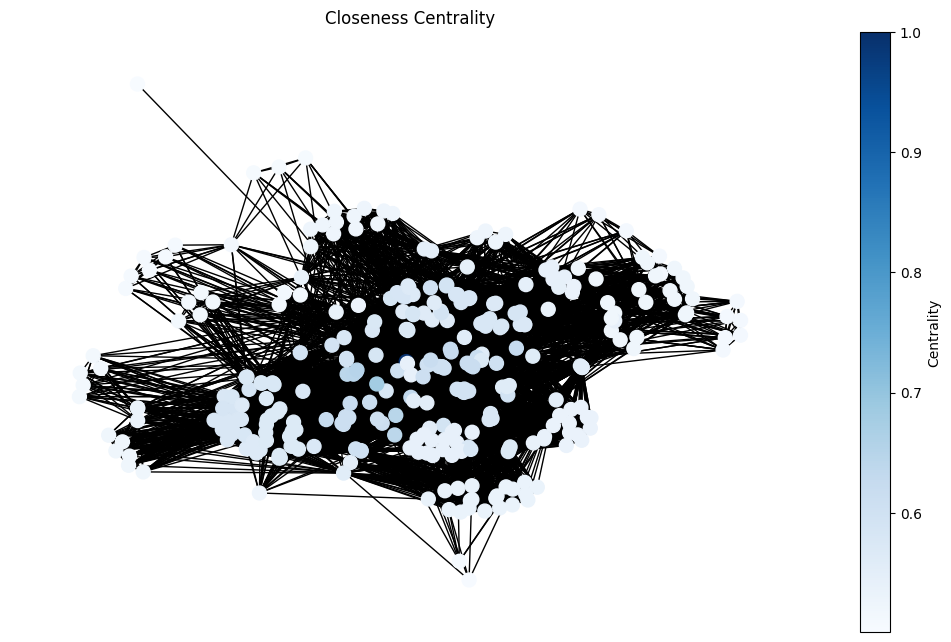

In [ ]:
# closeness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(closeness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Closeness Centrality")
plt.show()

#### degree centrality

In [ ]:
# degree centrality 계산
degree = nx.degree_centrality(G)

In [ ]:
# degree centrality를 데이터프레임으로 변환하고 정렬
degree_df = pd.DataFrame(degree.items(), columns=['Node', 'Degree'])
degree_df = degree_df.sort_values(by='Degree', ascending=False)

# CSV 파일로 저장
degree_df.to_csv('degree_centrality_graph2.csv', index=False)

<ipython-input-62-dc3e35499bc0>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


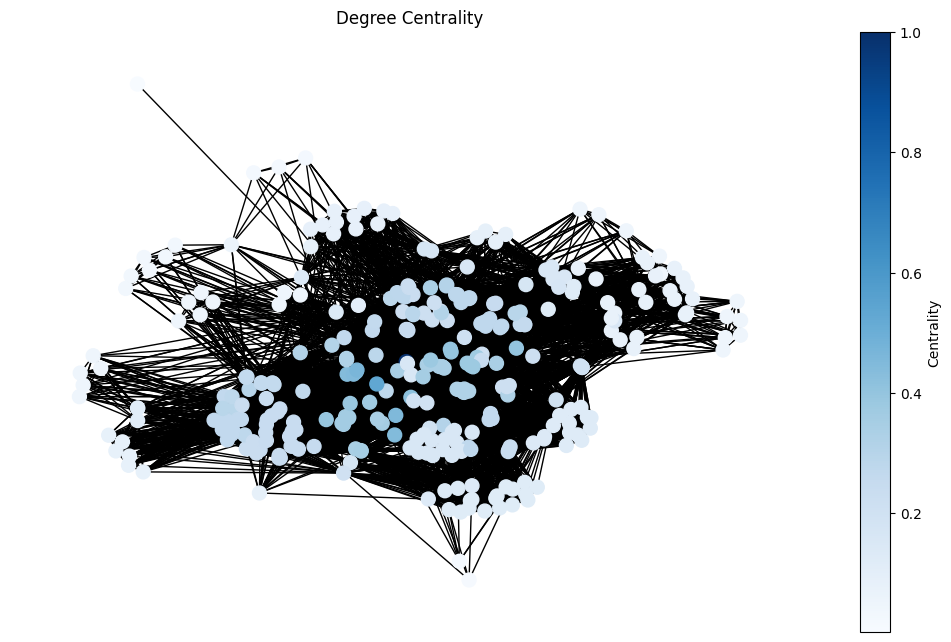

In [ ]:
# degree centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(degree.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Degree Centrality")
plt.show()

#### clustering coefficient

In [ ]:
# clustering coefficient 계산
clustering = nx.clustering(G)

In [ ]:
# clustering coefficient를 데이터프레임으로 변환하고 정렬
clustering_df = pd.DataFrame(clustering.items(), columns=['Node', 'Clustering'])
clustering_df = clustering_df.sort_values(by='Clustering', ascending=False)

# CSV 파일로 저장
clustering_df.to_csv('clustering_coefficient_graph2.csv', index=False)

<ipython-input-65-f1213f1f4155>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Clustering")


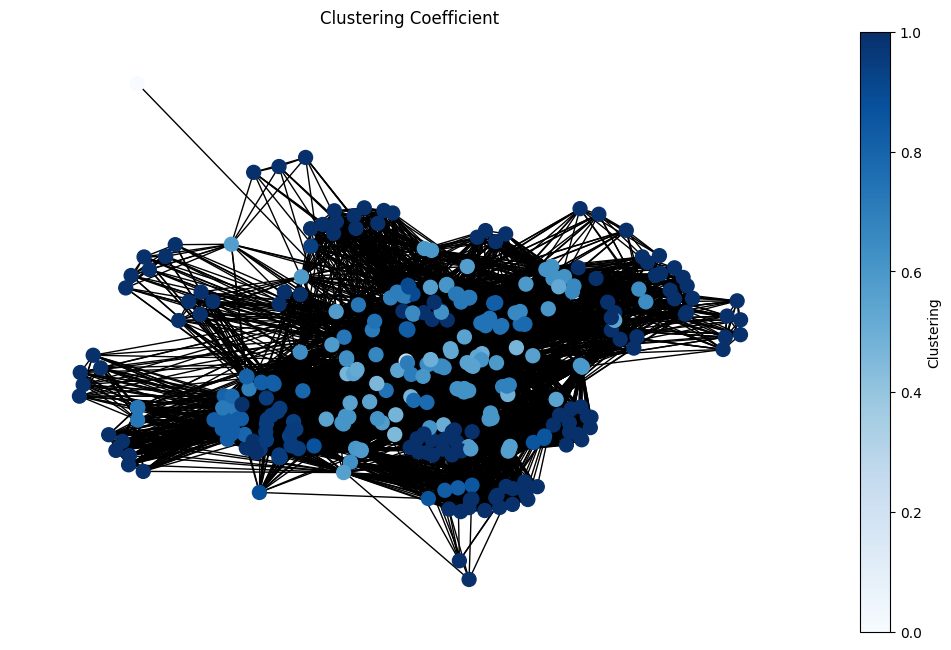

In [ ]:
# clustering coefficient 시각화
plt.figure(figsize=(10, 6))
node_color = list(clustering.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Clustering")
plt.title("Clustering Coefficient")
plt.show()

#### community detection

In [ ]:
# Louvain 알고리즘을 사용하여 community detection 수행
partition = community_louvain.best_partition(G)

# community 별 노드 출력
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes_in_community in communities.items():
    print(f"Community {community_id}: {nodes_in_community}")

Community 0: ['뤼튼테크놀로지스_뤼튼', '업스테이지_아숙업', '모아이스_골프픽스', '보이저엑스_브루', '매스프레소_콴다', '아우름플래닛_라이너', '블래스트', '아키드로우_아키스케치', '더스윙_스윙', '핀다_핀다', '트웰브랩스_마렝고', '모요_모요', '뉴빌리티_뉴비', '다비오_다비오맵', '프리윌린_매쓰플랫', '뤼이드_산타', '데이터노우즈_리치고', '패러닷_캐럿', '콜버스랩_자리톡', '시제_모노리스', '직방_직방', '지바이크_지쿠', '네오사피엔스_타입캐스트', '루센트블록_소유', '슈퍼브에이아이_슈퍼브에이아이', '자비스앤빌런즈_삼쩜삼', '스칼라데이터_모두의충전', '로앤컴퍼니_로톡', '필라이즈_필라이즈', '콕스웨이브_얼라인AI', '제로엑스플로우_원아워', '스트라드비젼_자율주행기능지원기술', '왓챠_왓챠', '튜링_수학대왕', '퓨리오사에이아이_WARBOY', '카카오브이엑스_카카오골프예약', '모레', '니어스랩', '스페이스브이_삼삼엠투', '페르소나에이아이_봇톡스', '마카롱팩토리_마이클', '인터콘시스템스_', '원프레딕트_원프레딕트', '파스토_파스토', '프렌들리에이아이_페리플로우', '스타일봇_스타일봇', '서울로보틱스_서울로보틱스', '포티투닷_탭', '노타_노타키보드', '마키나락스_MRX 솔루션', '비바이노베이션_착한의사', '에아아이트릭스', '아드리엘_아드리엘', '허그램_티그램', '코드박스_ZUZU', '딥브레인에이아이_스픽나우', '드림에이스', '패스트파이브_패스트파이브', '어웨이크코퍼레이션_초원인', '스켈터랩스_스켈터랩스', '클로봇', '앤스페이스_스페이스클라우드', '에이젠글로벌_에이젠글로벌', '튜닙', '컨텍터스_둥지', '엔젤스윙_엔젤스윙', '티맵모빌리티_티맵', '쉐어잇_쉐어잇', '작당모의_잼페이스', '비프로컴퍼니_비프로11', '뉴로핏', '인덴트코퍼레이션_브이리뷰', '엑스와이지', '마이프랜차이즈_마이프차', '밸류맵_밸류맵', '코드스테이츠_코드

In [ ]:
# community detection 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(partition.items(), columns=['Node', 'Community'])

# CSV 파일로 저장
result_df.to_csv('community_detection_graph2.csv', index=False)

<ipython-input-77-46f52a1cd750>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용


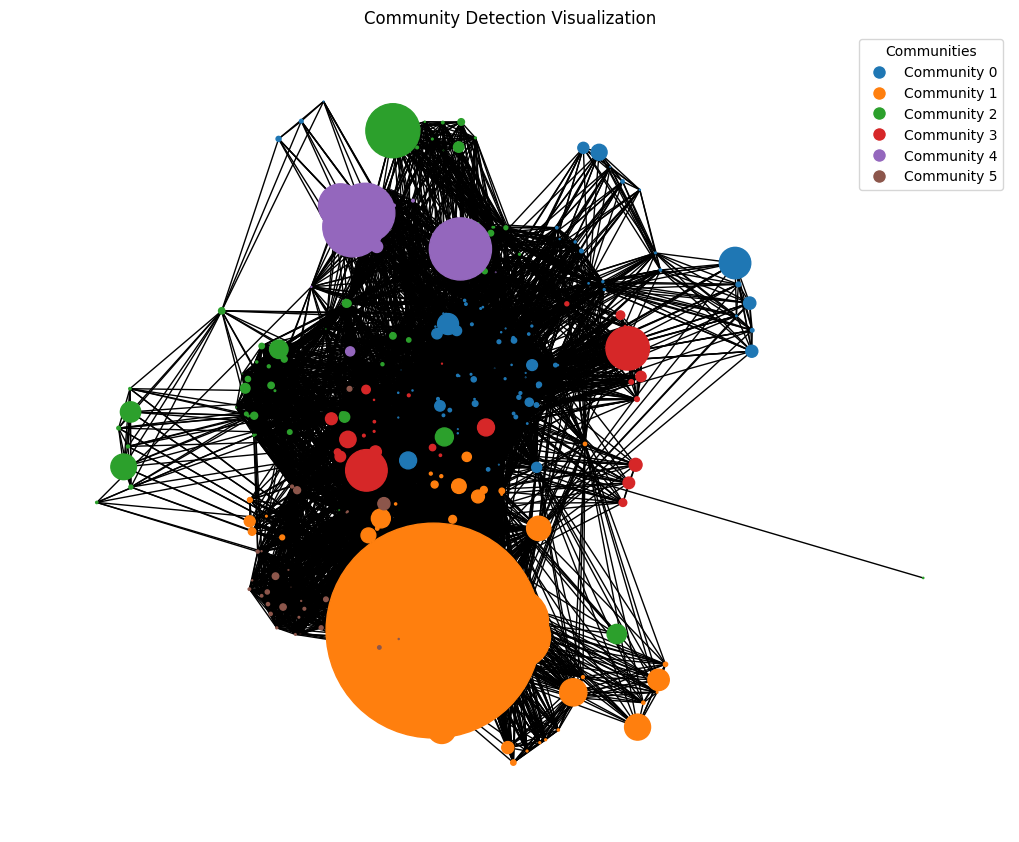

In [ ]:
# 시각화를 위한 노드 색상 설정
cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용
node_colors = [cmap(partition[node] % 10) for node in G.nodes()]

# 노드 크기 설정 (매출액 기반)
node_sizes = [G.nodes[node]['sales'] for node in G.nodes()]

# 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, with_labels=False)

# 커뮤니티 정보에 따라 범례 생성
unique_communities = set(partition.values())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(community_id % 10), markersize=10, label=f'Community {community_id}') for community_id in unique_communities]
plt.legend(handles=legend_handles, title='Communities', loc='upper right')

plt.title('Community Detection Visualization')
plt.show()

### **Graph 3**

#### 사용할 module import

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

#### 데이터 불러오기
**# Columns Information**
- company: 회사명
- investment: 누적투자금액
- sales: 매출
- employee: 고용수
- category: 카테고리
- keyword: 키워드
- establishment: 설립년도
- view: 최근 조회수
- total_mean: 최종 순위

In [ ]:
# CSV 파일 불러오기
nodes = pd.read_csv('/content/drive/MyDrive/2024-1 graph-mining/final_project/sort_top50.csv')

#### [Node] : startup name
- 회사명 : company
- 크기 : employee

In [ ]:
# 노드 데이터프레임에서 노드 리스트 생성
nodes_list = nodes['company'].tolist()

#### [Edge] : category
- 같은 카테고리 속한 기업 연결

In [ ]:
# 엣지 생성을 위한 데이터프레임 생성
edges_df = nodes[['company', 'category']].copy()

#### 그래프 생성
- Node와 Edge 연결
- Node의 attribute 추가 -> 고용인원수

In [ ]:
# 노드 리스트를 딕셔너리 형태로 변환하여 노드 ID로 사용
nodes_dict = {node: idx for idx, node in enumerate(nodes_list)}

In [ ]:
# 엣지를 연결할 그래프 객체 생성
G = nx.Graph()

In [ ]:
# 노드 추가 및 속성 설정
for idx, row in nodes.iterrows():
    company = row['company']
    employee = row['employee']
    G.add_node(company, employee=employee)

In [ ]:
# 엣지 추가
for _, row in edges_df.iterrows():
    company = row['company']
    categories = row['category'].split(',')  # 쉼표를 기준으로 카테고리를 분할
    for category in categories:
        # 같은 category에 속한 노드를 연결
        connected_nodes = edges_df[edges_df['category'].str.contains(category)]['company'].tolist()
        for connected_node in connected_nodes:
            if company != connected_node:  # 자기 자신과는 연결하지 않도록 조건 추가
                G.add_edge(company, connected_node)

#### graphml 함수


In [ ]:
# graphml 파일로 저장하는 함수 정의
def save_graphml(graph, filename):
    nx.write_graphml_lxml(graph, filename)

#### 생성된 Node, Edge 개수 확인

In [ ]:
# 노드 개수 출력
print("Number of nodes:", G.number_of_nodes())

# 엣지 개수 출력
print("Number of edges:", G.number_of_edges())

Number of nodes: 50
Number of edges: 308


#### graphml 파일로 저장

In [ ]:
# GraphML 파일로 저장
save_graphml(G, "startup_graph_3.graphml")

#### Network Analysis & Visualization

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [ ]:
# GraphML 파일로부터 그래프 불러오는 함수 정의
def load_graphml(filename):
    return nx.read_graphml(filename)

#### Graph Load & visualization

In [ ]:
# 그래프 로드
G = load_graphml("startup_graph_3.graphml")

In [ ]:
# 시각화를 위한 그래프 레이아웃 설정
pos = nx.spring_layout(G)

#### betweeness centrality

In [ ]:
# betweenness centrality 계산
betweenness = nx.betweenness_centrality(G)

In [ ]:
# betweenness centrality를 데이터프레임으로 변환하고 정렬
betweenness_df = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness'])
betweenness_df = betweenness_df.sort_values(by='Betweenness', ascending=False)

# CSV 파일로 저장
betweenness_df.to_csv('betweenness_centrality_graph3.csv', index=False)

<ipython-input-126-9c25feab9227>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


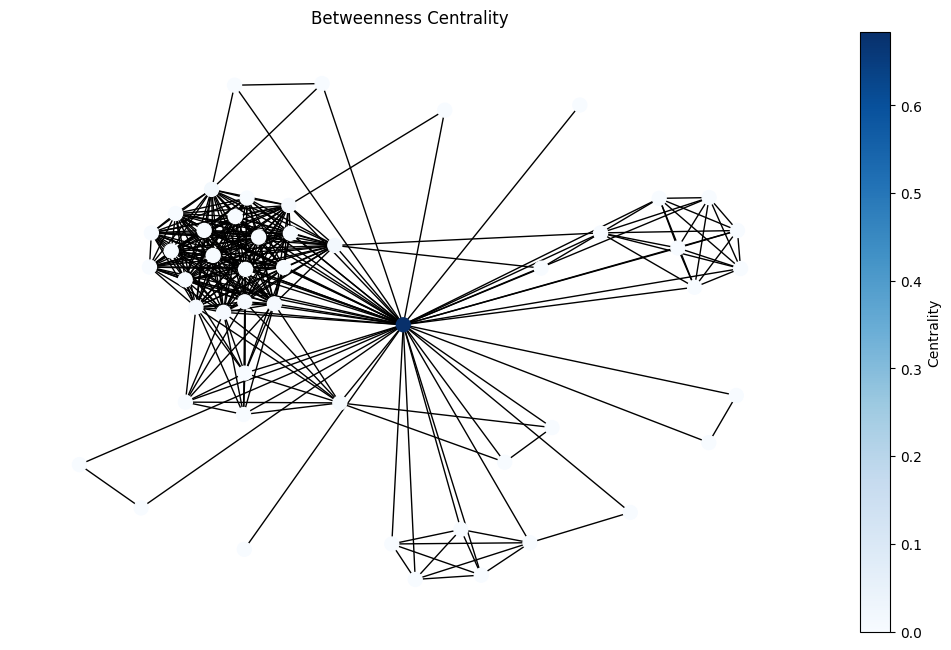

In [ ]:
# betweenness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(betweenness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Betweenness Centrality")
plt.show()

#### closeness centrality

In [ ]:
# closeness centrality 계산
closeness = nx.closeness_centrality(G)

In [ ]:
# closeness centrality를 데이터프레임으로 변환하고 정렬
closeness_df = pd.DataFrame(closeness.items(), columns=['Node', 'Closeness'])
closeness_df = closeness_df.sort_values(by='Closeness', ascending=False)

# CSV 파일로 저장
closeness_df.to_csv('closeness_centrality_graph3.csv', index=False)

In [ ]:
# closeness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(closeness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Closeness Centrality")
plt.show()

<ipython-input-129-e5c45fc11627>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


#### degree centrality

In [ ]:
# degree centrality 계산
degree = nx.degree_centrality(G)

In [ ]:
# degree centrality를 데이터프레임으로 변환하고 정렬
degree_df = pd.DataFrame(degree.items(), columns=['Node', 'Degree'])
degree_df = degree_df.sort_values(by='Degree', ascending=False)

# CSV 파일로 저장
degree_df.to_csv('degree_centrality_graph3.csv', index=False)

In [ ]:
# degree centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(degree.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Degree Centrality")
plt.show()

<ipython-input-132-dc3e35499bc0>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


#### clustering coefficient

In [ ]:
# clustering coefficient 계산
clustering = nx.clustering(G)

In [ ]:
# clustering coefficient를 데이터프레임으로 변환하고 정렬
clustering_df = pd.DataFrame(clustering.items(), columns=['Node', 'Clustering'])
clustering_df = clustering_df.sort_values(by='Clustering', ascending=False)

# CSV 파일로 저장
clustering_df.to_csv('clustering_coefficient_graph3.csv', index=False)

<ipython-input-135-f1213f1f4155>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Clustering")


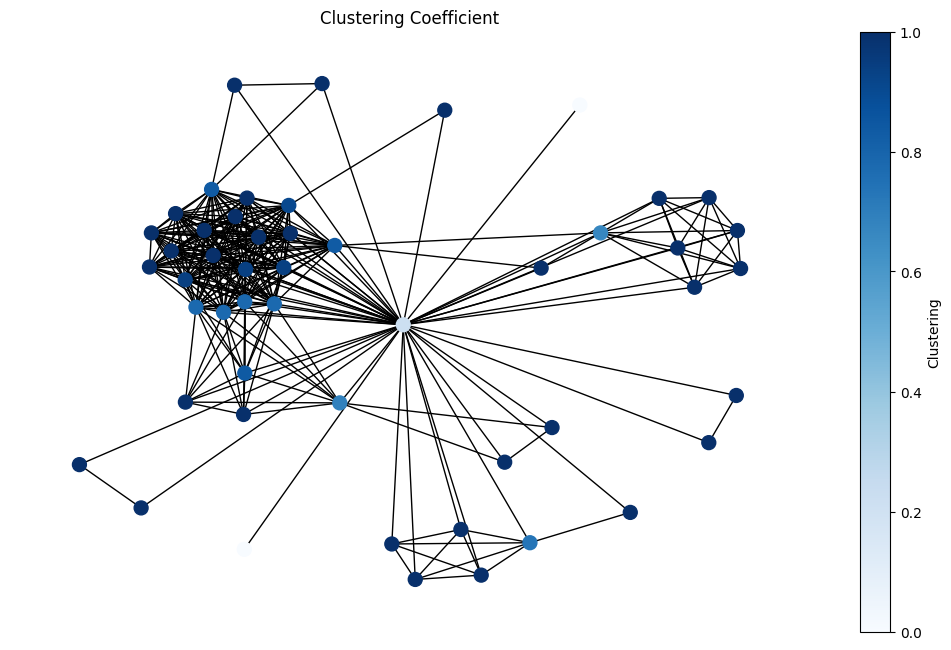

In [ ]:
# clustering coefficient 시각화
plt.figure(figsize=(10, 6))
node_color = list(clustering.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Clustering")
plt.title("Clustering Coefficient")
plt.show()

#### community detection

In [ ]:
# Louvain 알고리즘을 사용하여 community detection 수행
partition = community_louvain.best_partition(G)

# community 별 노드 출력
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes_in_community in communities.items():
    print(f"Community {community_id}: {nodes_in_community}")

Community 0: ['쿠팡_쿠팡', '컬리_컬리', '우아한형제들_배달의민족', '무신사_무신사', '프레시지_프레시지', '쏘카_쏘카', '크림_크림', '버킷플레이스_오늘의집', '에이블리코퍼레이션_에이블리', '딜리셔스_신상마켓', '트릿지_트릿지', '오아시스_오아시스마켓', '뉴넥스_브랜디', '피스피스스튜디오_마르디메크르디', '와디즈_와디즈', '트렌비_트렌비', '안다르_안다르', '라포랩스_퀸잇', '발란_발란', '정육각_정육각']
Community 1: ['카카오뱅크_카카오뱅크', '토스뱅크_토스뱅크', '비바리퍼블리카_토스', '토스페이먼츠_토스비즈니스', '두나무_업비트', '한국신용데이터_캐시노트', '의식주컴퍼니_런드리고', '핏펫_핏펫']
Community 3: ['티맵모빌리티_티맵', '하이브', '야놀자_야놀자', '스마트스코어_스마트스코어', '그로비교육_슈퍼브이', '리디_리디', '몰로코_몰로코', '여기어때_여기어떄', '데이원컴퍼니_패스트캠퍼스', '직방_직방', '패스트파이브_패스트파이브', '오케스트로_심포니 인공지능', '마인이스_차란', '레진엔터테인먼트_레진코믹스', '더스윙_스윙', '밀리의서재_밀리의서재']
Community 2: ['팀프레시_팀프레시', '부릉_부릉프렌즈', '스마트푸드네트웍스_차별화상회', '카카오브이엑스_카카오골프예약', '베어로보틱스_서비', '파스토_파스토']


In [ ]:
# community detection 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(partition.items(), columns=['Node', 'Community'])

# CSV 파일로 저장
result_df.to_csv('community_detection_graph3.csv', index=False)

In [ ]:
# 시각화를 위한 노드 색상 설정
cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용
node_colors = [cmap(partition[node] % 10) for node in G.nodes()]

# 노드 크기 설정 (고용인원수 기반)
node_sizes = [G.nodes[node]['employee'] for node in G.nodes()]

# 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, with_labels=False)

# 커뮤니티 정보에 따라 범례 생성
unique_communities = set(partition.values())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(community_id % 10), markersize=10, label=f'Community {community_id}') for community_id in unique_communities]
plt.legend(handles=legend_handles, title='Communities', loc='upper right')

plt.title('Community Detection Visualization')
plt.show()

<ipython-input-138-6762869e2658>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용


### **Graph 6**

#### 사용할 module import

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

#### 데이터 불러오기
**# Columns Information**
- company: 회사명
- investment: 누적투자금액
- sales: 매출
- employee: 고용수
- category: 카테고리
- keyword: 키워드
- establishment: 설립년도
- view: 최근 조회수
- total_mean: 최종 순위

In [ ]:
# CSV 파일 불러오기
nodes = pd.read_csv('/content/drive/MyDrive/2024-1 graph-mining/final_project/sort_top50.csv')

#### [Node] : startup name
- 회사명 : company
- 크기 : view

In [ ]:
# 노드 데이터프레임에서 노드 리스트 생성
nodes_list = nodes['company'].tolist()

#### [Edge] : category
- 같은 카테고리 속한 기업 연결

In [ ]:
# 엣지 생성을 위한 데이터프레임 생성
edges_df = nodes[['company', 'category']].copy()

#### 그래프 생성
- Node와 Edge 연결
- Node의 attribute 추가 -> 조회수

In [ ]:
# 노드 리스트를 딕셔너리 형태로 변환하여 노드 ID로 사용
nodes_dict = {node: idx for idx, node in enumerate(nodes_list)}

In [ ]:
# 엣지를 연결할 그래프 객체 생성
G = nx.Graph()

In [ ]:
# 노드 추가 및 속성 설정
for idx, row in nodes.iterrows():
    company = row['company']
    view = row['view']
    G.add_node(company, view=view)

In [ ]:
# 엣지 추가
for _, row in edges_df.iterrows():
    company = row['company']
    categories = row['category'].split(',')  # 쉼표를 기준으로 카테고리를 분할
    for category in categories:
        # 같은 category에 속한 노드를 연결
        connected_nodes = edges_df[edges_df['category'].str.contains(category)]['company'].tolist()
        for connected_node in connected_nodes:
            if company != connected_node:  # 자기 자신과는 연결하지 않도록 조건 추가
                G.add_edge(company, connected_node)

#### graphml 함수


In [ ]:
# graphml 파일로 저장하는 함수 정의
def save_graphml(graph, filename):
    nx.write_graphml_lxml(graph, filename)

#### 생성된 Node, Edge 개수 확인

In [ ]:
# 노드 개수 출력
print("Number of nodes:", G.number_of_nodes())

# 엣지 개수 출력
print("Number of edges:", G.number_of_edges())

Number of nodes: 50
Number of edges: 308


#### graphml 파일로 저장

In [ ]:
# GraphML 파일로 저장
save_graphml(G, "startup_graph_6.graphml")

#### Network Analysis & Visualization

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [ ]:
# GraphML 파일로부터 그래프 불러오는 함수 정의
def load_graphml(filename):
    return nx.read_graphml(filename)

#### Graph Load & visualization

In [ ]:
# 그래프 로드
G = load_graphml("startup_graph_6.graphml")

In [ ]:
# 시각화를 위한 그래프 레이아웃 설정
pos = nx.spring_layout(G)

#### betweeness centrality

In [ ]:
# betweenness centrality 계산
betweenness = nx.betweenness_centrality(G)

In [ ]:
# betweenness centrality를 데이터프레임으로 변환하고 정렬
betweenness_df = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness'])
betweenness_df = betweenness_df.sort_values(by='Betweenness', ascending=False)

# CSV 파일로 저장
betweenness_df.to_csv('betweenness_centrality_graph6.csv', index=False)

<ipython-input-158-9c25feab9227>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


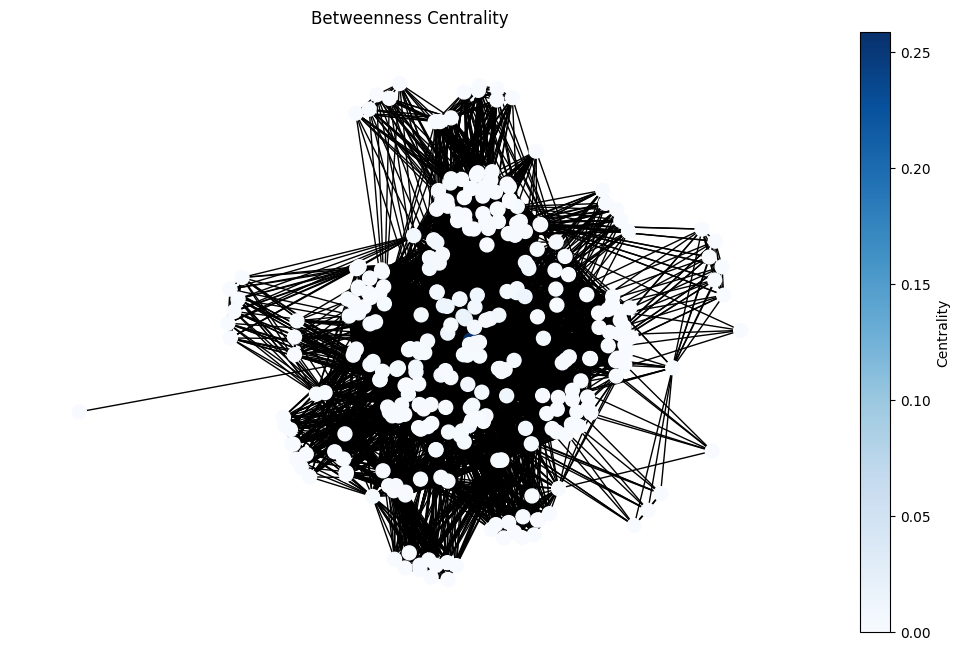

In [ ]:
# betweenness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(betweenness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Betweenness Centrality")
plt.show()

#### closeness centrality

In [ ]:
# closeness centrality 계산
closeness = nx.closeness_centrality(G)

In [ ]:
# closeness centrality를 데이터프레임으로 변환하고 정렬
closeness_df = pd.DataFrame(closeness.items(), columns=['Node', 'Closeness'])
closeness_df = closeness_df.sort_values(by='Closeness', ascending=False)

# CSV 파일로 저장
closeness_df.to_csv('closeness_centrality_graph6.csv', index=False)

In [ ]:
# closeness centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(closeness.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Closeness Centrality")
plt.show()

<ipython-input-162-e5c45fc11627>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


#### degree centrality

In [ ]:
# degree centrality 계산
degree = nx.degree_centrality(G)

In [ ]:
# degree centrality를 데이터프레임으로 변환하고 정렬
degree_df = pd.DataFrame(degree.items(), columns=['Node', 'Degree'])
degree_df = degree_df.sort_values(by='Degree', ascending=False)

# CSV 파일로 저장
degree_df.to_csv('degree_centrality_graph6.csv', index=False)

<ipython-input-165-dc3e35499bc0>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Centrality")


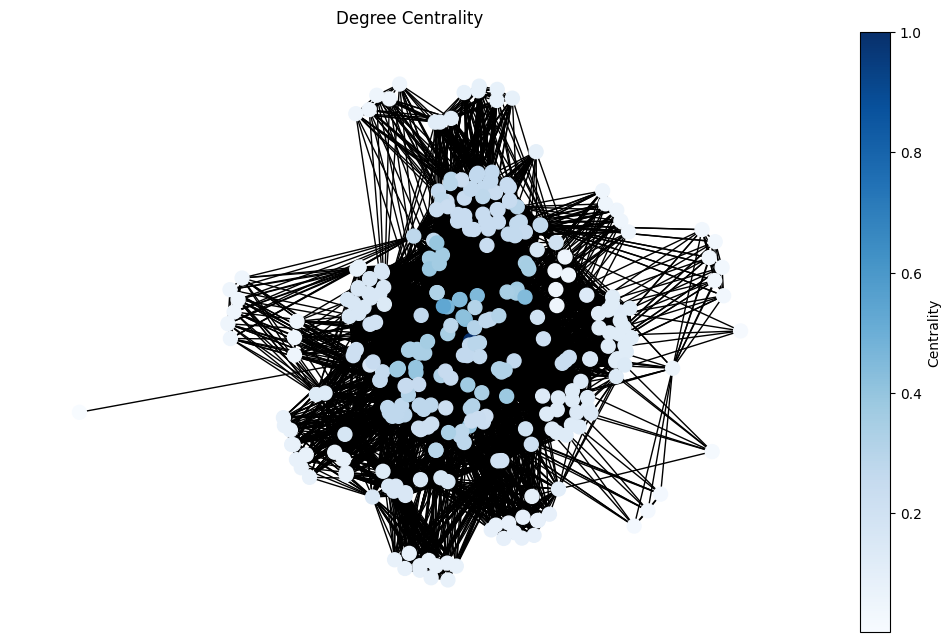

In [ ]:
# degree centrality 시각화
plt.figure(figsize=(10, 6))
node_color = list(degree.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Centrality")
plt.title("Degree Centrality")
plt.show()

#### clustering coefficient

In [ ]:
# clustering coefficient 계산
clustering = nx.clustering(G)

In [ ]:
# clustering coefficient를 데이터프레임으로 변환하고 정렬
clustering_df = pd.DataFrame(clustering.items(), columns=['Node', 'Clustering'])
clustering_df = clustering_df.sort_values(by='Clustering', ascending=False)

# CSV 파일로 저장
clustering_df.to_csv('clustering_coefficient_graph6.csv', index=False)

<ipython-input-168-f1213f1f4155>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Clustering")


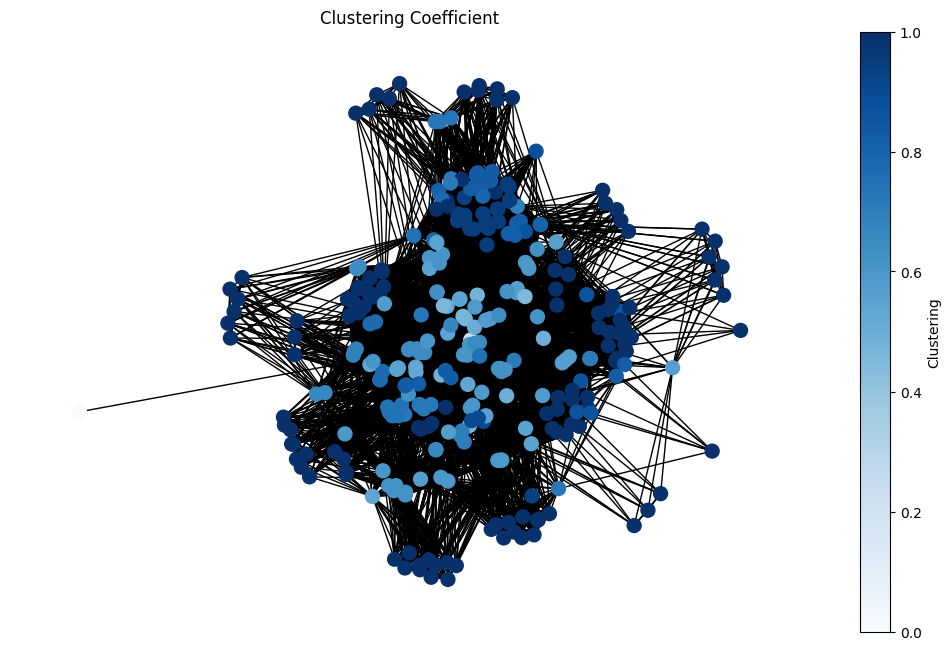

In [ ]:
# clustering coefficient 시각화
plt.figure(figsize=(10, 6))
node_color = list(clustering.values())
nx.draw(G, pos, node_color=node_color, cmap=plt.cm.Blues, node_size=100, with_labels=False)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(min(node_color), max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Clustering")
plt.title("Clustering Coefficient")
plt.show()

#### community detection

In [ ]:
# Louvain 알고리즘을 사용하여 community detection 수행
partition = community_louvain.best_partition(G)

# community 별 노드 출력
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes_in_community in communities.items():
    print(f"Community {community_id}: {nodes_in_community}")

Community 0: ['뤼튼테크놀로지스_뤼튼', '업스테이지_아숙업', '모아이스_골프픽스', '보이저엑스_브루', '매스프레소_콴다', '아우름플래닛_라이너', '블래스트', '아키드로우_아키스케치', '핀다_핀다', '트웰브랩스_마렝고', '뉴빌리티_뉴비', '프리윌린_매쓰플랫', '뤼이드_산타', '데이터노우즈_리치고', '패러닷_캐럿', '시제_모노리스', '버즈빌_버즈빌', '네오사피엔스_타입캐스트', '브레인커머스_잡플래닛', '루센트블록_소유', '슈퍼브에이아이_슈퍼브에이아이', '자비스앤빌런즈_삼쩜삼', '로앤컴퍼니_로톡', '필라이즈_필라이즈', '콕스웨이브_얼라인AI', '제로엑스플로우_원아워', '스트라드비젼_자율주행기능지원기술', '왓챠_왓챠', '튜링_수학대왕', '퓨리오사에이아이_WARBOY', '카카오브이엑스_카카오골프예약', '모레', '페르소나에이아이_봇톡스', '인터콘시스템스_', '원프레딕트_원프레딕트', '파스토_파스토', '스타일봇_스타일봇', '서울로보틱스_서울로보틱스', '마키나락스_MRX 솔루션', '비바이노베이션_착한의사', '와이어드컴퍼니_케미', '에아아이트릭스', '아드리엘_아드리엘', '몰로코_몰로코', '허그램_티그램', '코드박스_ZUZU', '딥브레인에이아이_스픽나우', '에이비일팔공', '어웨이크코퍼레이션_초원인', '스켈터랩스_스켈터랩스', '클로봇', '앤스페이스_스페이스클라우드', '에이젠글로벌_에이젠글로벌', '튜닙', '컨텍터스_둥지', '작당모의_잼페이스', '비프로컴퍼니_비프로11', '뉴로핏', '인덴트코퍼레이션_브이리뷰', '엑스와이지', '마이프랜차이즈_마이프차', '코드스테이츠_코드스테이츠', '피처링_피처링', '셀렉트스타_캐시미션', '수퍼톤_고요', '퀄슨_리얼클래스', '아들러_아들러', '한국공간데이터_클리니어', '플랭_플랭', '백퍼센트_충전돼지', '루닛_루닛 인사이트 CXR', '라이드플럭스', '베어로보틱스_서비', '그레이드헬스체인_로그', '에이아이포펫_티티

In [ ]:
# community detection 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(partition.items(), columns=['Node', 'Community'])

# CSV 파일로 저장
result_df.to_csv('community_detection_graph6.csv', index=False)

In [ ]:
# 시각화를 위한 노드 색상 설정
cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용
node_colors = [cmap(partition[node] % 10) for node in G.nodes()]

# 노드 크기 설정 (고용인원수 기반)
node_sizes = [G.nodes[node]['view'] for node in G.nodes()]

# 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, with_labels=False)

# 커뮤니티 정보에 따라 범례 생성
unique_communities = set(partition.values())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(community_id % 10), markersize=10, label=f'Community {community_id}') for community_id in unique_communities]
plt.legend(handles=legend_handles, title='Communities', loc='upper right')

plt.title('Community Detection Visualization')
plt.show()

<ipython-input-171-c9911d3ca187>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # 커스텀 컬러맵 사용
